Dataset (Balanced 5 Classes)

Found 4370 images belonging to 5 classes.
Found 545 images belonging to 5 classes.
Found 550 images belonging to 5 classes.
[INFO] Loading existing model...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 16, 16, 2048)      23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                 

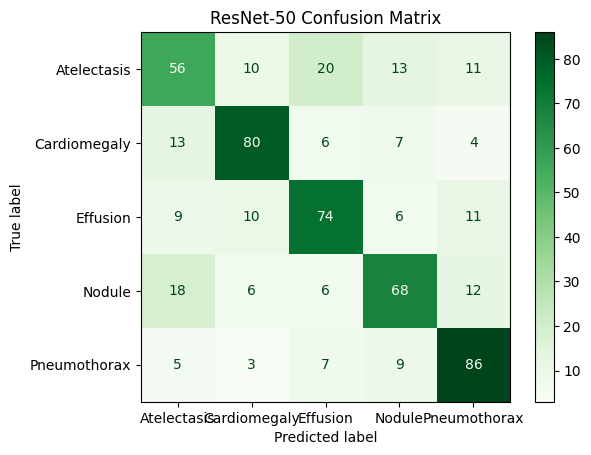


Test Classification Report:

              precision    recall  f1-score   support

 Atelectasis       0.55      0.51      0.53       110
Cardiomegaly       0.73      0.73      0.73       110
    Effusion       0.65      0.67      0.66       110
      Nodule       0.66      0.62      0.64       110
Pneumothorax       0.69      0.78      0.74       110

    accuracy                           0.66       550
   macro avg       0.66      0.66      0.66       550
weighted avg       0.66      0.66      0.66       550



In [ ]:
import os
import datetime
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# -----------------------------
# A) Directory Setup & Params
# -----------------------------
DATASET_PATH = r"C:\Users\arron\OneDrive\Documents\UTS\Post Graduate\Semester 4\49275 Neural Networks and Fuzzy Logic\Group Assignment\Datasets\Balanced_5_classes"
CLASSES = ['Atelectasis', 'Cardiomegaly', 'Effusion', 'Nodule', 'Pneumothorax']

TRAIN_PATH = os.path.join(DATASET_PATH, 'train')
VAL_PATH   = os.path.join(DATASET_PATH, 'val')
TEST_PATH  = os.path.join(DATASET_PATH, 'test')

IMG_SIZE = (512, 512)
BATCH_SIZE = 8
NUM_CLASSES = len(CLASSES)
EPOCHS = 80

# -----------------------------
# B) Data Generators
# -----------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.15,
    horizontal_flip=True,
    brightness_range=[0.85, 1.15]
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_gen = val_datagen.flow_from_directory(
    VAL_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_gen = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# -----------------------------
# C) Model Construction (ResNet50)
# -----------------------------
CHECKPOINT_FILE = 'resnet50_best_model.h5'

if os.path.exists(CHECKPOINT_FILE):
    print("[INFO] Loading existing model...")
    model = tf.keras.models.load_model(CHECKPOINT_FILE)
else:
    print("[INFO] Building new ResNet50 model...")

    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
    base_model.trainable = True  # Allow fine-tuning

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.4),
        layers.BatchNormalization(),
        layers.Dense(NUM_CLASSES, activation='softmax')
    ])

    model.compile(
        optimizer=optimizers.Adam(learning_rate=2e-4),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

model.summary()

# -----------------------------
# D) Callbacks
# -----------------------------
log_dir = os.path.join("logs_resnet50", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
callbacks = [
    TensorBoard(log_dir=log_dir),
    ModelCheckpoint(CHECKPOINT_FILE, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=4, min_lr=1e-6, verbose=1)
]

# -----------------------------
# E) Training
# -----------------------------
history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    callbacks=callbacks
)

# -----------------------------
# F) Evaluation
# -----------------------------
loss, acc = model.evaluate(test_gen)
print(f"\nTest Accuracy: {acc:.4f} | Test Loss: {loss:.4f}")

# Confusion Matrix
y_pred_probs = model.predict(test_gen)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_gen.classes

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen.class_indices.keys())
disp.plot(cmap=plt.cm.Greens)
plt.title("ResNet-50 Confusion Matrix")
plt.show()

# -----------------------------
# G) Classification Report
# -----------------------------
report = classification_report(y_true, y_pred, target_names=CLASSES)
print("\nTest Classification Report:\n")
print(report)

# Optional: save the report to a .txt file
with open("classification_report_resnet50.txt", "w") as f:
    f.write("Test Classification Report:\n\n")
    f.write(report)


Updated Dataset (1500_Xray)

Folder Structure is Different, so adjust work accordingly.

Found 6440 images belonging to 5 classes.
Found 545 images belonging to 5 classes.
Found 550 images belonging to 5 classes.
[INFO] Loading existing model...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 16, 16, 2048)      23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                 

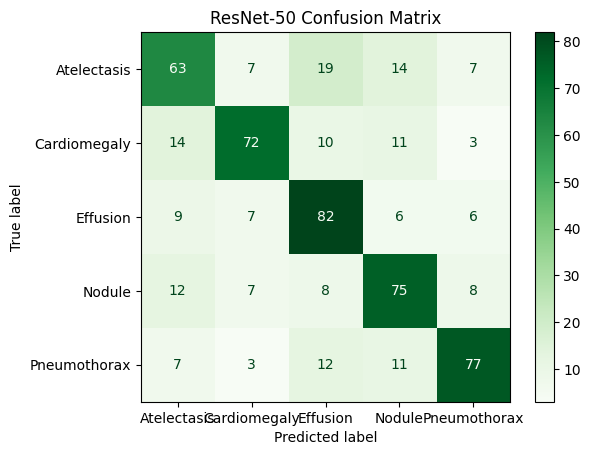


Test Classification Report:

              precision    recall  f1-score   support

 Atelectasis       0.60      0.57      0.59       110
Cardiomegaly       0.75      0.65      0.70       110
    Effusion       0.63      0.75      0.68       110
      Nodule       0.64      0.68      0.66       110
Pneumothorax       0.76      0.70      0.73       110

    accuracy                           0.67       550
   macro avg       0.68      0.67      0.67       550
weighted avg       0.68      0.67      0.67       550



In [1]:
import os
import datetime
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# -----------------------------
# A) Directory Setup & Params
# -----------------------------
DATASET_PATH = r"C:\Users\arron\OneDrive\Documents\UTS\Post Graduate\Semester 4\49275 Neural Networks and Fuzzy Logic\Group Assignment\Datasets\1500_Xray\DATA\1500_train"
CLASSES = ['Atelectasis', 'Cardiomegaly', 'Effusion', 'Nodule', 'Pneumothorax']

TRAIN_PATH = os.path.join(DATASET_PATH, 'train')
VAL_PATH   = os.path.join(DATASET_PATH, 'val')
TEST_PATH  = os.path.join(DATASET_PATH, 'test')

IMG_SIZE = (512, 512)
BATCH_SIZE = 8
NUM_CLASSES = len(CLASSES)
EPOCHS = 80

# -----------------------------
# B) Data Generators
# -----------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.15,
    horizontal_flip=True,
    brightness_range=[0.85, 1.15]
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_gen = val_datagen.flow_from_directory(
    VAL_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_gen = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# -----------------------------
# C) Model Construction (ResNet50)
# -----------------------------
CHECKPOINT_FILE = 'resnet50_best_model.h5'

if os.path.exists(CHECKPOINT_FILE):
    print("[INFO] Loading existing model...")
    model = tf.keras.models.load_model(CHECKPOINT_FILE)
else:
    print("[INFO] Building new ResNet50 model...")

    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
    base_model.trainable = True  # Allow fine-tuning

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.4),
        layers.BatchNormalization(),
        layers.Dense(NUM_CLASSES, activation='softmax')
    ])

    model.compile(
        optimizer=optimizers.Adam(learning_rate=2e-4),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

model.summary()

# -----------------------------
# D) Callbacks
# -----------------------------
log_dir = os.path.join("logs_resnet50", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
callbacks = [
    TensorBoard(log_dir=log_dir),
    ModelCheckpoint(CHECKPOINT_FILE, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=4, min_lr=1e-6, verbose=1)
]

# -----------------------------
# E) Training
# -----------------------------
history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    callbacks=callbacks
)

# -----------------------------
# F) Evaluation
# -----------------------------
loss, acc = model.evaluate(test_gen)
print(f"\nTest Accuracy: {acc:.4f} | Test Loss: {loss:.4f}")

# Confusion Matrix
y_pred_probs = model.predict(test_gen)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_gen.classes

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen.class_indices.keys())
disp.plot(cmap=plt.cm.Greens)
plt.title("ResNet-50 Confusion Matrix")
plt.show()

# -----------------------------
# G) Classification Report
# -----------------------------
report = classification_report(y_true, y_pred, target_names=CLASSES)
print("\nTest Classification Report:\n")
print(report)

# Optional: save the report to a .txt file
with open("classification_report_resnet50.txt", "w") as f:
    f.write("Test Classification Report:\n\n")
    f.write(report)


Ensemble Model Work

In [ ]:
import cv2  # Or your preferred image loading library
import numpy as np

# --- Assume these predictor functions are imported correctly ---
from efficientnetb0 import predictor as predictor_efficientnet
from resnet50_predictor import predictor as predictor_resnet50
from densenet121.densenet import predictor as predictor_densenet
from swin.swin import predictor as predictor_swin
from yolo11s.yolo11s import predictor as predictor_yolo
from inceptionv3.inceptionv3 import predictor as predictor_inception

# --- Placeholder Predictor Functions (Replace with your actual imports) ---
# def predictor_efficientnet(img): return {'Atelectasis': 0.7, 'Cardiomegaly': 0.1, 'Effusion': 0.6, 'Nodule': 0.3, 'Pneumothorax': 0.8}
# def predictor_resnet50(img): return {'Atelectasis': 0.6, 'Cardiomegaly': 0.8, 'Effusion': 0.5, 'Nodule': 0.7, 'Pneumothorax': 0.2}
# def predictor_densenet(img): return {'Atelectasis': 0.65, 'Cardiomegaly': 0.75, 'Effusion': 0.8, 'Nodule': 0.75, 'Pneumothorax': 0.78}
# def predictor_swin(img): return {'Atelectasis': 0.5, 'Cardiomegaly': 0.85, 'Effusion': 0.6, 'Nodule': 0.65, 'Pneumothorax': 0.6}
# def predictor_yolo(img): return {'Atelectasis': 0.55, 'Cardiomegaly': 0.7, 'Effusion': 0.7, 'Nodule': 0.6, 'Pneumothorax': 0.65}
# def predictor_inception(img): return {'Atelectasis': 0.75, 'Cardiomegaly': 0.72, 'Effusion': 0.65, 'Nodule': 0.5, 'Pneumothorax': 0.7}
# --- End Placeholder Predictors ---

# --- List of classes ---
classes = ['Atelectasis', 'Cardiomegaly', 'Effusion', 'Nodule', 'Pneumothorax']

# --- Map model names to their predictor functions ---
model_predictors = {
    'EfficientNet': predictor_efficientnet,
    'ResNet50': predictor_resnet50,
    'DenseNet': predictor_densenet,
    'Swin Transformer': predictor_swin,
    'YOLOv11s': predictor_yolo,
    'InceptionV3': predictor_inception
}

def average_voting_ensemble_predict(image_path, threshold=0.5):
    """
    Performs plain average voting ensemble prediction.

    Args:
        image_path (str): Path to the input image.
        threshold (float): Threshold to convert average scores to binary predictions.

    Returns:
        tuple: A tuple containing:
            - dict: Dictionary of final average scores for each class.
            - dict: Dictionary of binary predictions (1 or 0) for each class.
    """
    try:
        # Load the image
        image = cv2.imread(image_path)
        if image is None:
            raise FileNotFoundError(f"Image not found at {image_path}")
        # Add any necessary preprocessing for your models here if needed
        # image = preprocess_image(image)

    except Exception as e:
        print(f"Error loading or preprocessing image: {e}")
        return None, None

    # --- Get predictions from all models ---
    model_predictions = {}
    print("Running individual model predictions...")
    for model_name, predictor_func in model_predictors.items():
        try:
            print(f"  Predicting with {model_name}...")
            model_predictions[model_name] = predictor_func(image)
            # Basic validation of prediction format
            if not isinstance(model_predictions[model_name], dict) or \
               not all(cls in model_predictions[model_name] for cls in classes):
                print(f"Warning: Unexpected output format from {model_name}. Expecting dict with keys: {classes}")
        except Exception as e:
            print(f"Error during prediction with {model_name}: {e}")
            continue
    print("Finished individual predictions.")

    # --- Calculate plain average scores (no weights) ---
    final_average_scores = {cls: 0.0 for cls in classes}

    for cls in classes:
        model_count = 0
        for model_name, individual_prediction in model_predictions.items():
            if cls in individual_prediction:
                prob = individual_prediction[cls]
                final_average_scores[cls] += prob
                model_count += 1

        if model_count > 0:
            final_average_scores[cls] /= model_count
        else:
            print(f"Warning: No predictions available for class '{cls}' from any model.")

    # --- Apply threshold for final binary predictions ---
    final_binary_predictions = {
        cls: 1 if final_average_scores[cls] >= threshold else 0
        for cls in classes
    }

    return final_average_scores, final_binary_predictions

# --- Example Usage ---
if __name__ == "__main__":
    image_file = r"C:\Users\arron\OneDrive\Documents\UTS\Post Graduate\Semester 4\49275 Neural Networks and Fuzzy Logic\Group Assignment\Datasets\1500_Xray\DATA\1500_train\test\Atelectasis\00000459_031.png" # <--- CHANGE THIS to your actual image path

    avg_scores, binary_predictions = average_voting_ensemble_predict(image_file)

    if avg_scores and binary_predictions:
        print("\n--- Ensemble Results ---")
        print("Final Average Scores:")
        for cls, score in avg_scores.items():
            print(f"  {cls}: {score:.4f}")

        print("\nFinal Binary Predictions (Threshold={}):".format(0.5))
        for cls, prediction in binary_predictions.items():
            print(f"  {cls}: {prediction}")


Running individual model predictions...
  Predicting with EfficientNet...
  Predicting with ResNet50...
  Predicting with DenseNet...
Error during prediction with DenseNet: Model weights file not found at: ./densenet121/best_model\checkpoint.weights.h5
  Predicting with Swin Transformer...
  Predicting with YOLOv11s...
  Predicting with InceptionV3...
Finished individual predictions.

--- Ensemble Results ---
Final Average Scores:
  Atelectasis: 0.5698
  Cardiomegaly: 0.5194
  Effusion: 0.5756
  Nodule: 0.4239
  Pneumothorax: 0.5553

Final Binary Predictions (Threshold=0.5):
  Atelectasis: 1
  Cardiomegaly: 1
  Effusion: 1
  Nodule: 0
  Pneumothorax: 1
